In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/content/tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.shape


(244, 7)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [8]:
df.isnull().sum()


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

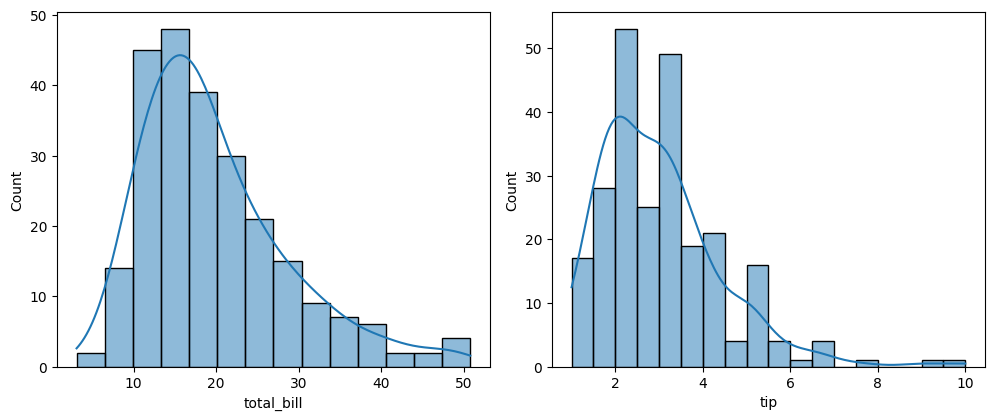

In [10]:
# Plot distributions for 'total_bill' and 'tip'
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2, 3, i + 1)
    sb.histplot(df[col], kde=True)
    plt.tight_layout()

plt.show()

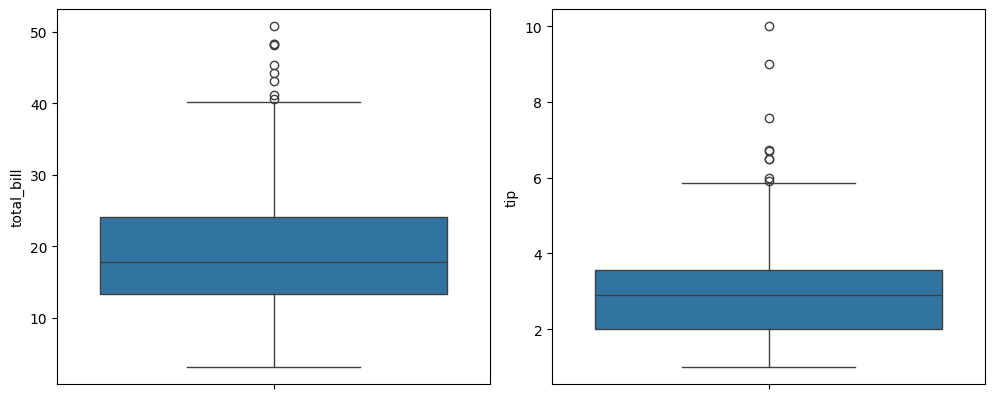

In [12]:
# Plot boxplots for 'total_bill' and 'tip'
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
    plt.subplot(2, 3, i + 1)
    sb.boxplot(df[col])
    plt.tight_layout()

plt.show()


In [13]:
df.shape, df[(df['total_bill']<45) & (df['tip']<7)].shape


((244, 7), (238, 7))

In [14]:
df = df[(df['total_bill']<45) & (df['tip']<7)]


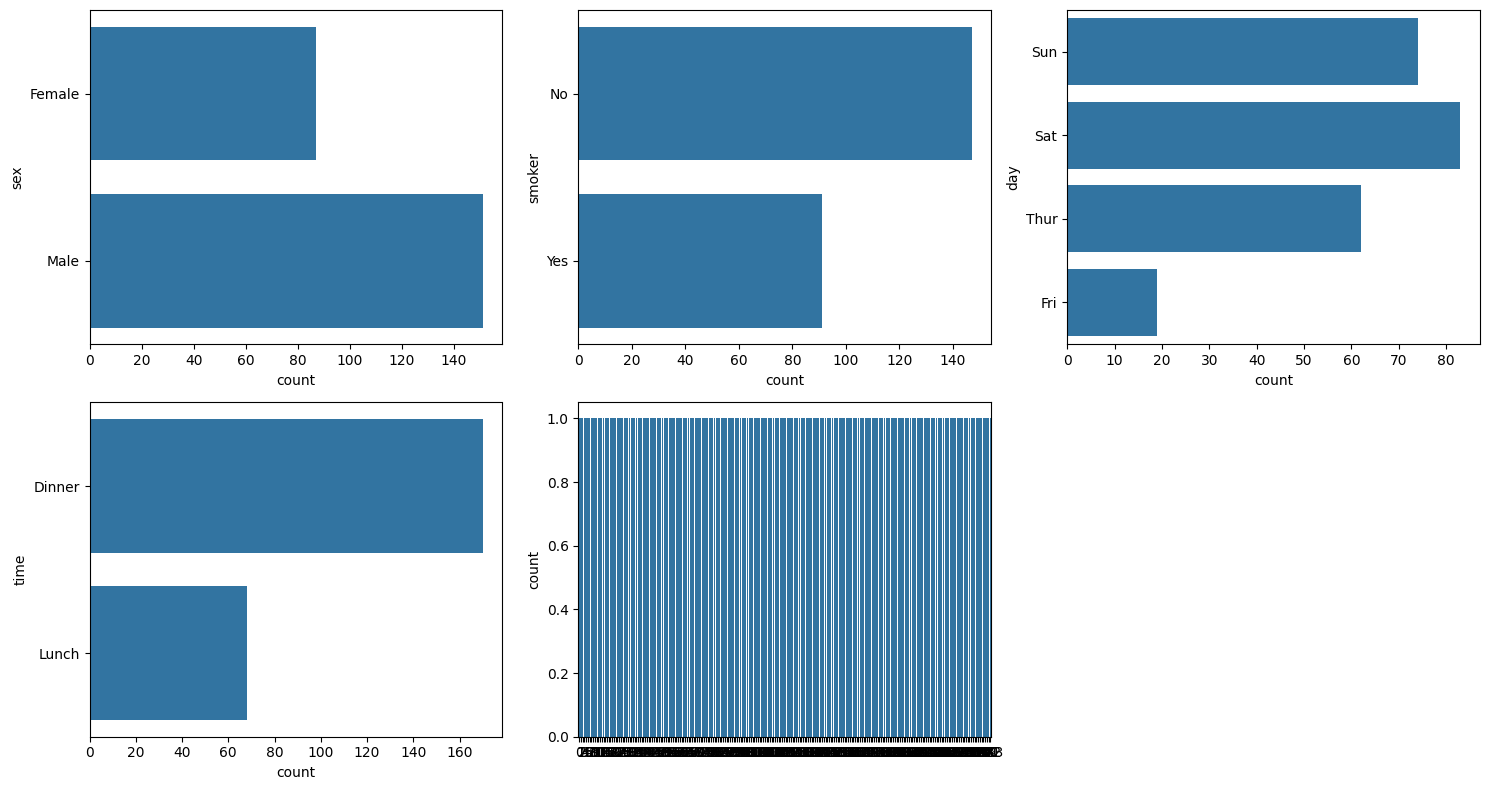

In [17]:
# Select columns from 'sex' to 'size'
feat = df.loc[:, 'sex':'size'].columns

# Plot count plots for each selected feature
plt.subplots(figsize=(15,8))
for i, col in enumerate(feat):
    plt.subplot(2, 3, i + 1)
    sb.countplot(df[col])
    plt.tight_layout()

plt.show()

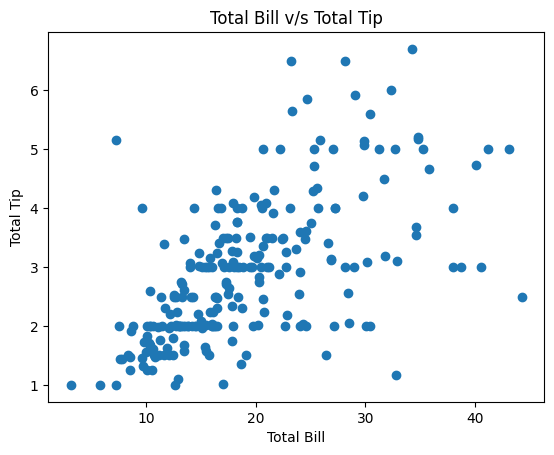

In [18]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()


In [21]:
# Check data types
print(df.dtypes)

# Select numeric columns only
numeric_columns = df.select_dtypes(include=[np.number])

# Group the DataFrame by 'size' and calculate the mean for each numeric column only
mean_values = numeric_columns.groupby(df['size']).mean()
print(mean_values)


total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
      total_bill       tip  size
size                            
1       7.242500  1.437500   1.0
2      16.448013  2.582308   2.0
3      21.899722  3.206667   3.0
4      27.137647  3.814706   4.0
5      30.068000  4.028000   5.0
6      30.383333  5.300000   6.0


In [23]:
# Group the DataFrame by 'size' and calculate the mean for numeric columns only
mean_values = numeric_columns.groupby(df['size']).mean()
print(mean_values)


      total_bill       tip  size
size                            
1       7.242500  1.437500   1.0
2      16.448013  2.582308   2.0
3      21.899722  3.206667   3.0
4      27.137647  3.814706   4.0
5      30.068000  4.028000   5.0
6      30.383333  5.300000   6.0


In [24]:
print(df.dtypes)


total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


In [25]:
# Filter out non-numeric columns before grouping and calculating mean
numeric_columns = df.select_dtypes(include=[np.number])

# Perform the grouping and mean calculation on numeric columns
mean_values = numeric_columns.groupby(df['size']).mean()
print(mean_values)


      total_bill       tip  size
size                            
1       7.242500  1.437500   1.0
2      16.448013  2.582308   2.0
3      21.899722  3.206667   3.0
4      27.137647  3.814706   4.0
5      30.068000  4.028000   5.0
6      30.383333  5.300000   6.0


In [26]:
# List columns with non-numeric data
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['sex', 'smoker', 'day', 'time'], dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through each column in the DataFrame
for col in df.columns:
    # Check if the column is of object (string) data type
    if df[col].dtype == object:
        # Apply LabelEncoder to the column
        df[col] = le.fit_transform(df[col])

# Display the first few rows of the DataFrame
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


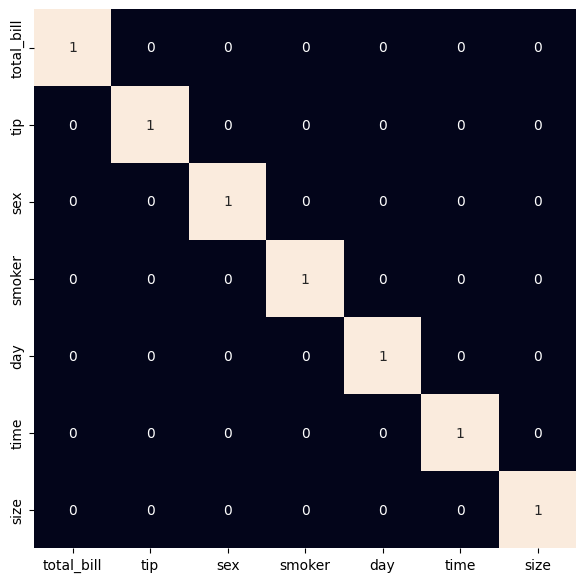

In [29]:
plt.figure(figsize=(7,7))
sb.heatmap(df.corr() > 0.7, annot = True, cbar = False)
plt.show()


In [30]:
features = df.drop('tip', axis=1)
target = df['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape


((190, 6), (48, 6))

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [33]:
# List of models to train
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

# Train and evaluate each model
for model in models:
    model.fit(X_train, Y_train)

    print(f'{model.__class__.__name__} : ')

    pred_train = model.predict(X_train)
    print('Training Accuracy : ', mae(Y_train, pred_train))

    pred_val = model.predict(X_val)
    print('Validation Accuracy : ', mae(Y_val, pred_val))
    print()


LinearRegression : 
Training Accuracy :  0.6866406322422778
Validation Accuracy :  0.7903774704017295

XGBRegressor : 
Training Accuracy :  0.02728007923929315
Validation Accuracy :  0.7682166453202566

RandomForestRegressor : 
Training Accuracy :  0.28190736842105263
Validation Accuracy :  0.7470541666666662

AdaBoostRegressor : 
Training Accuracy :  0.6124902599426622
Validation Accuracy :  0.868953202220634



     Actual  Predicted
87     4.00     2.7389
47     6.00     4.7408
126    1.48     1.5184
201    2.01     2.1015
15     3.92     3.9241
Mean Absolute Error (MAE): 0.71


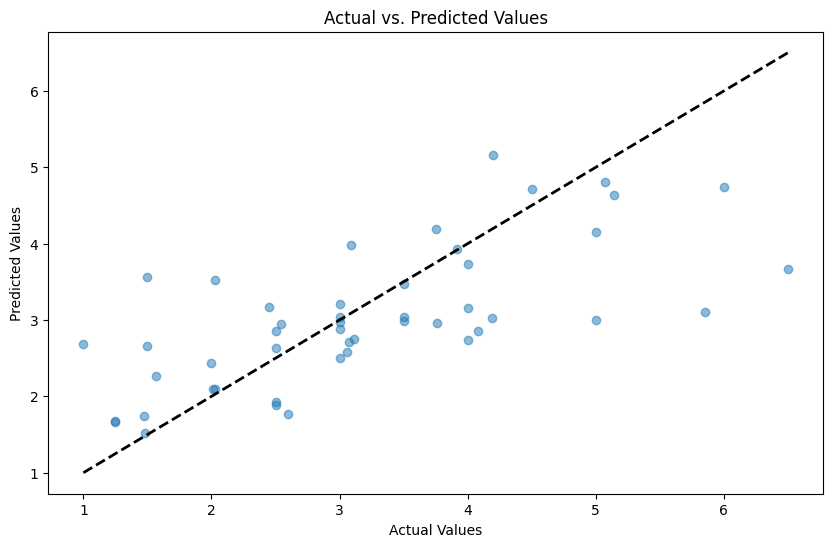

In [40]:
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae

# Assuming you have a trained model and validation data
# Make predictions on the validation set
predictions = selected_model.predict(X_val)

# Create a DataFrame to hold actual values and predictions
results_df = pd.DataFrame({
    'Actual': Y_val,
    'Predicted': predictions
})

# Print the results
print(results_df.head())

# Calculate and print the Mean Absolute Error (MAE)
mae_value = mae(Y_val, predictions)
print(f"Mean Absolute Error (MAE): {mae_value:.2f}")

# Optional: Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Y_val, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'k--', lw=2)
plt.show()